# Assn06:  Probability, Random Variables

Refer to the Lecture06 notes (available on PandA) when completing this assignment.

___

**Question**: What is the main difference between analytical and numerical probability calculations?

**Answer**: As far as I read the material, analytical probability calculation is applying mathematics equation to calculate probability. On the other hand, numerical probability calculation is generating random values to obtain probability from the proportion of number that exceeds the threshold.

___

**Question**: What are two benefits of numerical probability calculations?

**Answer**: First, it is beneficial when analytical probability cannot use equation to calculate probability variables. Second, it is used to validate analytical probability calculations.

___

**Question**: Is the function depicted below a probability density function?  Why or why not? 

**Answer**: The characteristic of probability density function is the total probability is 1. However, as obviously seen, the total probability of the function depicted below is 0.

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

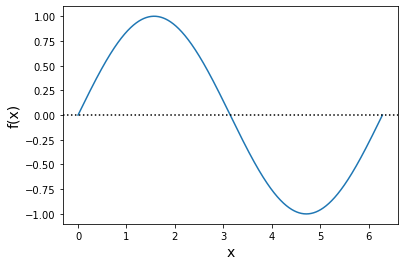

In [2]:
from math import pi
x = np.linspace(0, 2*pi, 1001)
f = np.sin(x)

plt.figure()
ax = plt.axes()
ax.plot(x, f)
ax.axhline(0, color='k', linestyle=':')
ax.set_xlabel('x', size=14)
ax.set_ylabel('f(x)', size=14)
plt.show()

___

**Question**: What are the mean and standard deviation values for the “standard normal” distribution?

**Answer**: mean is 0 and standard deviation is 1 for 'standard normal' distribution.

___

**Question**: For a uniform random variable $x$, what is the probability that $x$ is greater than 0.1?  Compute this probability both analytically and numerically using Python.

**Answer**: The probability is 0.9. The code was obtained from lecture06 material.

In [70]:
# (Enter relevant calculations here)
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

x0   = np.linspace(-1, 2, 1001)
pdf0 = stats.uniform.pdf(x0)
p0 = stats.uniform.sf(0.1)
print('Uniform: P(x > 0.1) = ', p0)

x1 = np.random.rand(1001)
p1 = (x1 > 0.1).mean()
print('Uniform (numerical result): P(x > 0.1) = ', p1)

Uniform: P(x > 0.1) =  0.9
Uniform (numerical result): P(x > 0.1) =  0.8931068931068931


___

**Question**: In the previous question, were the analytical and numerical results exactly the same?  Why or why not?

**Answer**: No, they are not the same as seen in the output above, but they are very close. The reason is that the random number generator is imperfect, so it only can approximate the true analytical distribution.

___

**Task**: Complete the table below using analytical calculations.  Use three significant digits. Show your calculations in a Python cell.

<br>


Distribution |  $P(x>0)$    | $P(x>0.5)$    | $P(x>1.0)$    | $P(x>2.0)$    | $P(x>3.0)$
------------ | ------------ | ------------- | ------------- | ------------- | -------------
<img width=50/> | <img width=100/> | <img width=100/> | <img width=100/> | <img width=100/> | <img width=100/>
Uniform      | 1.000        |  0.500             |  0.000             | 0.000         | 0.000
Normal       | 0.500        |      0.309         |      0.159         |    0.023           | 0.001
$\chi^2$  ($\nu=5$)   | 1.000          |  0.992             |    0.963           |   0.849            | 0.700

In [58]:
# (Enter relevant calculations here)
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

x0   = np.linspace(-1, 2, 1001)
x1   = np.linspace(-4, 4, 1001)
x2   = np.linspace(0, 20, 1001)

pdf0 = stats.uniform.pdf(x0)
pdf1 = stats.norm.pdf(x1)  
pdf2 = stats.chi2.pdf(x2, 5)

n = [0.0,0.5,1.0,2.0,3.0]
for i in n:
    print('uniform(x >',i,") =",stats.uniform.sf(i))
    print('Normal (x >',i,") =",stats.norm.sf(i))
    print('Chi    (x >',i,") =",stats.chi2.sf(i, 5))
    print("-----------------------------------")

uniform(x > 0.0 ) = 1.0
Normal (x > 0.0 ) = 0.5
Chi    (x > 0.0 ) = 1.0
-----------------------------------
uniform(x > 0.5 ) = 0.5
Normal (x > 0.5 ) = 0.3085375387259869
Chi    (x > 0.5 ) = 0.9921232932326296
-----------------------------------
uniform(x > 1.0 ) = 0.0
Normal (x > 1.0 ) = 0.15865525393145707
Chi    (x > 1.0 ) = 0.9625657732472964
-----------------------------------
uniform(x > 2.0 ) = 0.0
Normal (x > 2.0 ) = 0.022750131948179195
Chi    (x > 2.0 ) = 0.8491450360846096
-----------------------------------
uniform(x > 3.0 ) = 0.0
Normal (x > 3.0 ) = 0.0013498980316300933
Chi    (x > 3.0 ) = 0.6999858358786276
-----------------------------------


___

## Bonus

(+2 Points)

Numerically verify the analytical survival functions for:
1. the normal distribution, and
2. the $\chi^2$ distribution with 7 degrees of freedom

*Hint*:
* Refer to the **"Numerically verifying survival functions"** section in Lecture06.html (available on PandA). 

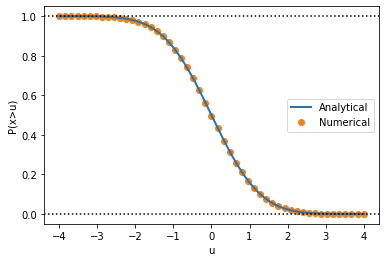

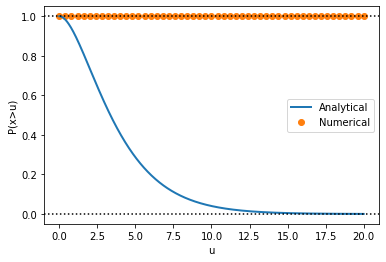

In [68]:
# (Enter relevant calculations and figure(s) here)
u0   = np.linspace(-4, 4, 1001)
u1   = np.linspace(0, 20, 1001) 
sf0  = stats.norm.sf(u0)
sf1  = stats.chi2.sf(u1,4)

x0   = np.random.randn(10000)     # random values from the normal distribution
x1   = np.random.chisquare(10000) # random values from the chisquare distribution
u0n  = np.linspace(-4, 4, 51)     # thresholds for numerical survival function calculations 
u1n  = np.linspace(0,20,51)
sf0n = [(x0>uu).mean() for uu in u0n]  # numerical survival function calculations for normal
sf1n = [(x1>uu).mean() for uu in u1n]  # numerical survival function calculations for chisquare

# print(u0n)
# print(sf0n)
# print(sf1n)

# plot the analytical and numerical survival functions:
plt.figure()
ax = plt.axes()
ax.plot(u0, sf0, linewidth=2, zorder=1, label='Analytical')
ax.plot(u0n, sf0n, 'o', zorder=0, label='Numerical')
ax.axhline(0, color='k', linestyle=':')
ax.axhline(1, color='k', linestyle=':')
ax.legend()
ax.set_xlabel('u')
ax.set_ylabel('P(x>u)')

plt.figure()
ax = plt.axes()
ax.plot(u1, sf1, linewidth=2, zorder=1, label='Analytical')
ax.plot(u1n, sf1n, 'o', zorder=0, label='Numerical')
ax.axhline(0, color='k', linestyle=':')
ax.axhline(1, color='k', linestyle=':')
ax.legend()
ax.set_xlabel('u')
ax.set_ylabel('P(x>u)')
plt.show()

___

## Bonus

(+2 Points)

If:
* $x$ contains 10 values: 0, 1, 2, ... 9
* $y$ contains 10 random values from the normal distribution

Then:
* What is the probability that the correlation coefficient (between $x$ and $y$) is greater than 0.5?

*Hints*:
* Calculate this probability numerically using 10000 different sets of random data
* Refer to Lecture 05 for correlation coefficient calculations.

In [106]:
# (Enter relevant calculations and figure(s) here)
x = np.linspace(0,9,10) #Create x
r = [] #create list r
for i in range (1,10000):
    y = np.random.randn(10)
    s = np.corrcoef(x, y)[0,1]
    r.append(s) #put every coefficient in list r

r = np.array(r) #change r to array to compute the next line
g = (r > 0.5).mean() #get probability
print("the probability is %.4f" %g) 

the probability is 0.0718
